# <span style="color:#F6B93B">Medicaid Drug Spending</span>

This project analyzes a dataset provided by the Centers for Medicare & Medicaid Services (CMS) detailing spending on Medicaid-covered outpatient prescription drugs prescribed by physicians and other healthcare professionals from 2018 to 2022. The purpose of this analysis is to examine trends in drug spending and utilization over time. These insights can help inform Medicaid policy decisions, particularly around drug price negotiations, identify patterns in prescribing and utilization behavior, and highlight areas of rising costs or increased demand.

Key Metrics Measured will Include:
- Average Spending per Dosage Unit
- Change in Average Spending per dosage unit over time

Drug spending metrics reveal the total amount reimbursed by both Medicaid and non-Medicaid entitites to pharmacies for the drug.

### <span style="color:#A2D5D0">Importing the Data</span>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [88]:
# Import the dataset MedicaidDrugSpending.csv and assign it to a variable called df
df = pd.read_csv('MedicaidDrugSpending.csv')
# Verify the size of 'df
df.shape

(16459, 36)

##### Analysis: This dataset contains 16,459 rows and 36 columns

### <span style="color:#A2D5D0">About the Data Set</span>

In [104]:
# Show info about 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        16459 non-null  object 
 1   Gnrc_Name                        16459 non-null  object 
 2   Tot_Mftr                         16459 non-null  int64  
 3   Mftr_Name                        16459 non-null  object 
 4   Tot_Spndng_2018                  11541 non-null  float64
 5   Tot_Dsg_Unts_2018                11541 non-null  float64
 6   Tot_Clms_2018                    11541 non-null  float64
 7   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  11541 non-null  float64
 8   Avg_Spnd_Per_Clm_2018            11541 non-null  float64
 9   Outlier_Flag_2018                11541 non-null  float64
 10  Tot_Spndng_2019                  12720 non-null  float64
 11  Tot_Dsg_Unts_2019                12720 non-null  float64
 12  Tot_Clms_2019     

#####Analysis: The columns in this data set provide the following information:
- 'Brnd_Name': The name of the drug filled, including both trademarked names and generic drugs that don't have a trademarked name.

- 'Gnrc_Name': The chemical ingredient of the drug.

- 'Tot_Mftr' and 'Mftr_Name': The total number of manufacturers for a drug and the names of those manufacturers. This data can reveal manufacturers that dominate the Medicaid outpatient drug market. 

- 'Tot_Spndng_YEAR': Aggregate drug spending for the Medicaid program during the benefit year. 

- 'Tot_Dsg_Unts_YEAR': sum of dosage units of medications dispensed across the calnedar year. 

- 'Tot_Clms_YEAR': number of prescription fills for each drug, including original prescriptions and refills. 

- 'Avg_Spnd_Per_Dsg_Unt_Wghtd_YEAR': Medicaid drug spending divided by the number of dosage units weighted by proportion of total claims. 

- 'Avg_Spnd_Per_Clm_YEAR': Medicaid drug spending divided by the number of prescription fills. 

- 'Outlier_Flag_YEAR': Yearly outlier flag variable.

- 'Chg_Avg_Spnd_Per_Dsg_Unt_21_22': percent change in average spending per dosage unit from the prior year. 

- 'CAGR_Avg_Spnd_Per_Dsg_Unt_18_22': constant average change in spending per dosage unit over the most recent five year data, calculated using compound annual growth rate (CAGR). 

### <span style="color:#A2D5D0">Data Analysis</span>

> ### <span style="color:#F24C00">Manufacturers and Drugs</span>

In [119]:
df['Mftr_Name'].value_counts()

Mftr_Name
Overall             4331
Teva USA             276
Mylan                259
Sandoz               251
Major Pharmaceu      249
                    ... 
Nobelpharma Ame        1
Hospira/Pfizer-        1
Ani Pharmaceuti*       1
Lineage/Impax G        1
Eli Lilly & Co.*       1
Name: count, Length: 980, dtype: int64

In [133]:
df['Mftr_Name'].value_counts().head(11)

Mftr_Name
Overall            4331
Teva USA            276
Mylan               259
Sandoz              251
Major Pharmaceu     249
Ahp                 236
Amneal Pharmace     230
Aurobindo Pharm     222
Northstar Rx Ll     198
Actavis/Teva        189
Mylan Instituti     185
Name: count, dtype: int64

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/535433551.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Mftr_Name', data=top_10_df, palette='light:#5A9_r')


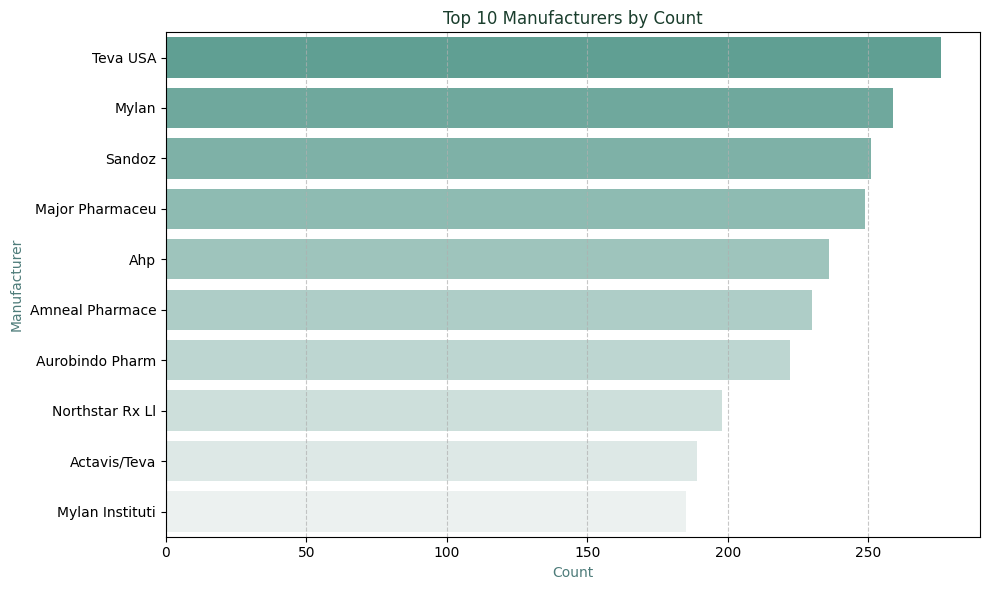

In [146]:
# Data for the top 10 manufacturers
top_10_manufacturers = {
    'Mftr_Name': ['Teva USA', 'Mylan', 'Sandoz', 'Major Pharmaceu', 'Ahp', 
                  'Amneal Pharmace', 'Aurobindo Pharm', 'Northstar Rx Ll', 'Actavis/Teva', 'Mylan Instituti'],
    'Count': [276, 259, 251, 249, 236, 230, 222, 198, 189, 185]
}

# Create a DataFrame
top_10_df = pd.DataFrame(top_10_manufacturers)

# Plot the sideways bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Mftr_Name', data=top_10_df, palette='light:#5A9_r')
# Define colors
colors = {
    "Dark jungle green": "#1A3E2D",
    "Myrtle Green": "#4E7C7A",
    "Dark sea green": "#8FBC8F",
    "Light sea green": "#20B2AA",
    "Medium sea green": "#3CB371"
}
plt.title('Top 10 Manufacturers by Count', color=colors["Dark jungle green"])
plt.xlabel('Count', color=colors["Myrtle Green"])
plt.ylabel('Manufacturer', color=colors["Myrtle Green"])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [158]:
# What is the least frequent Manufacturer name?
least_frequent_manufacturer = df['Mftr_Name'].value_counts().idxmin()
least_frequent_manufacturer_count = df['Mftr_Name'].value_counts().min()
print(f"The least frequent manufacturer is {least_frequent_manufacturer} with a count of {least_frequent_manufacturer_count}.")

The least frequent manufacturer is Abbott Nutritio with a count of 1.


In [169]:
abbott_nutrition = df[df['Mftr_Name'] == 'Abbott Nutritio']

# Print the Brnd_Name and Gnrc_Name columns for the filtered rows
print(abbott_nutrition[['Brnd_Name', 'Gnrc_Name']])

       Brnd_Name              Gnrc_Name
11768  Pedialyte  Electrolytes/Dextrose


##### Analysis: There are 980 unique manufacturers in the data set based on the length of the data set. The top 10 manufacturers, other than the 'Overall' category which represents the general manufacturers for the drugs include Teva USA, Mylan, Sandoz, Major Pharmaceu, Ahp, Amneal Pharmace, Aurobindo Pharm, Northstar RxLl, Actavis/Teva, and Mylan Instituti. The least frequent manufacturer is Abbott Nutritio, which is the manufacturer for Pedialyte, or the generic Electrolytes/Dextrose.

In [179]:
df['Brnd_Name'].value_counts()
# Find the brand name that appears the most
most_frequent_brand = df['Brnd_Name'].value_counts().idxmax()
most_frequent_brand_count = df['Brnd_Name'].value_counts().max()
# Find the brand name that appears the least
least_frequent_brand = df['Brnd_Name'].value_counts().idxmin()
least_frequent_brand_count = df['Brnd_Name'].value_counts().min()
print(f"Most frequent brand name: {most_frequent_brand} ({most_frequent_brand_count} times)")
print(f"Least frequent brand name: {least_frequent_brand} ({least_frequent_brand_count} time)")
# Find the generic name that appears the most
most_frequent_generic = df['Gnrc_Name'].value_counts().idxmax()
most_frequent_generic_count = df['Gnrc_Name'].value_counts().max()
# Find the generic name that appears the least
least_frequent_generic = df['Gnrc_Name'].value_counts().idxmin()
least_frequent_generic_count = df['Gnrc_Name'].value_counts().min()
print(f"Most frequent generic name: {most_frequent_generic} ({most_frequent_generic_count} times)")
print(f"Least frequent generic name: {least_frequent_generic} ({least_frequent_generic_count} time)")

Most frequent brand name: Fenofibrate (50 times)
Least frequent brand name: Oyster Shell Calcium-Vit D3 (2 time)
Most frequent generic name: Metformin HCl (76 times)
Least frequent generic name: Doravirine (2 time)


In [188]:
fenofibrate_generic = df[df['Brnd_Name'] == 'Fenofibrate']['Gnrc_Name'].unique()
print(f"Generic name for Fenofibrate: {fenofibrate_generic}")

Generic name for Fenofibrate: ['Fenofibrate' 'Fenofibrate Nanocrystallized' 'Fenofibrate,Micronized']


##### Analysis: The most frequent brand name in the data set is Fenofibratewhich is commonly used to lower triglyceride levels (a type of fat in blood) for people with severely high triglyceride levels. Thinking about the broader Medicaid population, this is reflective of the high rates of diabetes reported. Approximately three in four adults in Medicaid report having at least one or more chronis, with the highest conditions being high blood pressure (5.2 Million), high cholesterol (3.7 Million), Obesity (3.4 million), and type 1 or 2 diabetes (2.9 million) of the any 13.9 million physical conditions reported.

In [196]:
df[df['Gnrc_Name'] == 'Metformin HCl']['Brnd_Name'].unique()


array(['Glumetza', 'Metformin ER Gastric', 'Metformin ER Osmotic',
       'Metformin HCl', 'Metformin HCl ER', 'Riomet'], dtype=object)

In [203]:
metformin_brand_counts = df[df['Gnrc_Name'] == 'Metformin HCl']['Brnd_Name'].value_counts()
print("Counts of brand names for Metformin HCl:")
print(metformin_brand_counts)

Counts of brand names for Metformin HCl:
Brnd_Name
Metformin HCl           31
Metformin HCl ER        22
Metformin ER Gastric    10
Metformin ER Osmotic     9
Glumetza                 2
Riomet                   2
Name: count, dtype: int64


##### Analysis: The most frequent generic name drug is Metformin HCl, which is an oral medicine that helps lower blood sugar levels in people with type 2 diabetes. Metformin HCl was under the brand names 'Metformin HCl', 'Metformin HCl ER', 'Metformin ER Gastric', 'Metformin ER Osmotic', 'Glumetza', 'Riomet'. Below are the manufacturers for each brand name Metformin is sold under:

In [209]:
metformin_brands = ['Metformin HCl', 'Metformin HCl ER', 'Metformin ER Gastric', 'Metformin ER Osmotic', 'Glumetza', 'Riomet']
manufacturers_by_brand = {brand: df[df['Brnd_Name'] == brand]['Mftr_Name'].unique() for brand in metformin_brands}

# Print the results
for brand, manufacturers in manufacturers_by_brand.items():
    print(f"Manufacturers for {brand}: {manufacturers}")

Manufacturers for Metformin HCl: ['Overall' 'Westminster Pha' 'Trupharma, LLC.' 'Time-Cap Labs'
 'Tagi Pharma' 'Solco Healthcar' 'Sciegen Pharmac' 'Mylan'
 'Micro Labs USA,' 'Mckesson Packag' 'Major Pharmaceu' 'Legacy Pharmace'
 'Laurus Labs Lim' 'Ingenus Pharmac' 'Mylan Instituti' 'Teva USA'
 'Granules Pharma' 'Epic Pharma LLC' 'Chartwell Rx Ll' 'Carlsbad Tech'
 'Zydus Pharmaceu' 'Caraco/Sun Phar' 'Caraco Pharm' 'Breckenridge'
 'Avet Pharmaceut' 'Aurobindo Pharm' 'Ascend Laborato' 'Apotex Corp'
 'Amneal Pharmace' 'Ahp' 'Aci Healthcare']
Manufacturers for Metformin HCl ER: ['Overall' 'Viona Pharmaceu' 'Unichem Pharmac' 'Time-Cap Labs' 'Teva USA'
 'Tagi Pharma' 'Sun Pharmaceuti' 'Nostrum Laborat' 'Nivagen Pharmac'
 'Major Pharmaceu' 'Macleods Pharma' 'Legacy Pharmace' 'Granules Pharma'
 'Epic Pharma LLC' 'Bayshore Pharma' 'Avpak' 'Aurobindo Pharm'
 'Ascend Laborato' 'Apotex Corp' 'Amneal Pharmace' 'Ahp' 'Actavis/Teva']
Manufacturers for Metformin ER Gastric: ['Overall' 'Sun Pharma Glob'

> ### <span style="color:#F24C00">Total Spending Between 2018 and 2022</span>

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/879278864.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total Spending', data=spending_comparison, palette='viridis')


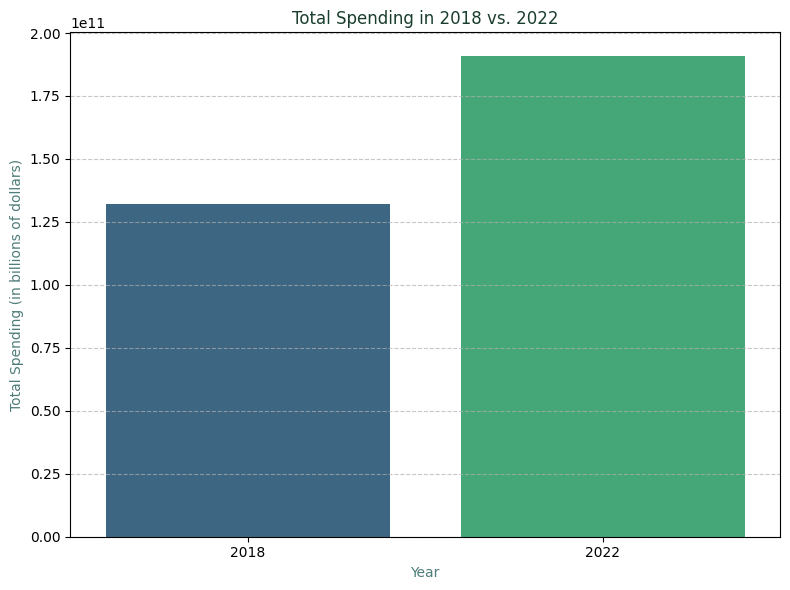

In [214]:
total_spending_2018 = df['Tot_Spndng_2018'].sum()
total_spending_2022 = df['Tot_Spndng_2022'].sum()

# Create a DataFrame for plotting
spending_comparison = pd.DataFrame({
    'Year': ['2018', '2022'],
    'Total Spending': [total_spending_2018, total_spending_2022]
})

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Total Spending', data=spending_comparison, palette='viridis')
plt.title('Total Spending in 2018 vs. 2022', color=colors["Dark jungle green"])
plt.xlabel('Year', color=colors["Myrtle Green"])
plt.ylabel('Total Spending (in billions of dollars)', color=colors["Myrtle Green"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Analysis: The bar graph comparing total Medicaid spending in 2018 and 2022 reveals a significant increase in spending over the five-year period. Total spending rose from approximately $131.95 billion in 2018 to $190.74 billion in 2022, representing a substantial growth. This increase could be attributed to factors such as rising drug prices, increased utilization of prescription drugs, or the introduction of new, high-cost medications. Further analysis is needed to identify the specific drivers of this growth, such as changes in average spending per dosage unit, claims, or shifts in prescribing patterns.


This trend can be further seen in the chart below:

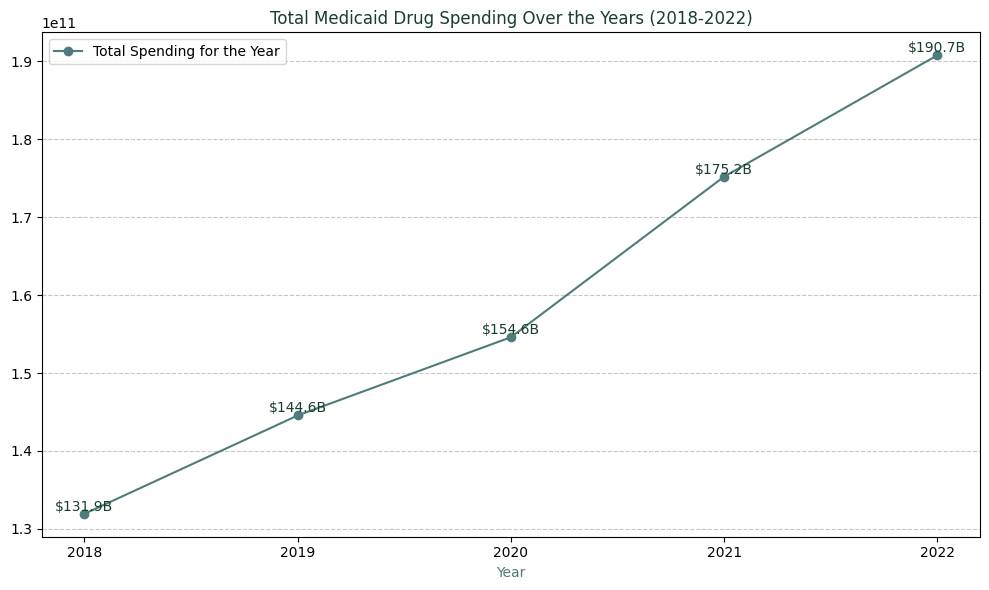

In [218]:
years = ['2018', '2019', '2020', '2021', '2022']
total_spending = [
    total_spending_2018,
    df['Tot_Spndng_2019'].sum(),
    df['Tot_Spndng_2020'].sum(),
    df['Tot_Spndng_2021'].sum(),
    total_spending_2022
]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years, total_spending, marker='o', color=colors["Myrtle Green"], label='Total Spending for the Year')

# Add labels for each data point
for i, value in enumerate(total_spending):
    plt.text(years[i], value, f"${value/1e9:.1f}B", ha='center', va='bottom', fontsize=10, color=colors["Dark jungle green"])

# Add title and labels
plt.title('Total Medicaid Drug Spending Over the Years (2018-2022)', color=colors["Dark jungle green"])
plt.xlabel('Year', color=colors["Myrtle Green"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [221]:
# Calculate the percent change in total spending from 2018 to 2022
percent_change = ((total_spending_2022 - total_spending_2018) / total_spending_2018) * 100
print(f"Percent change in total spending from 2018 to 2022: {percent_change:.2f}%")

Percent change in total spending from 2018 to 2022: 44.55%


##### Analysis: Between 2018 and 2022, there was a 44.55% rise in Medicaid Drug spending. In the broader context of Medicaid drug spending on outpatient prescription drugs, this can be partly be attributed to the introduction of new, high-cost specialty drugs.

> ### <span style="color:#F24C00">Average Total Spending on Drugs</span>

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/2256395267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


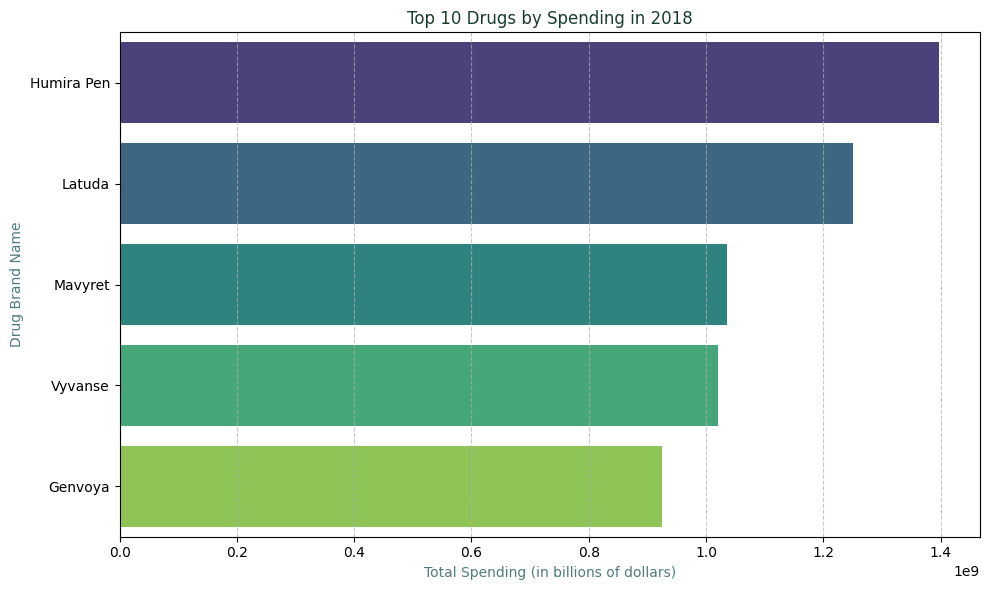

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/2256395267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


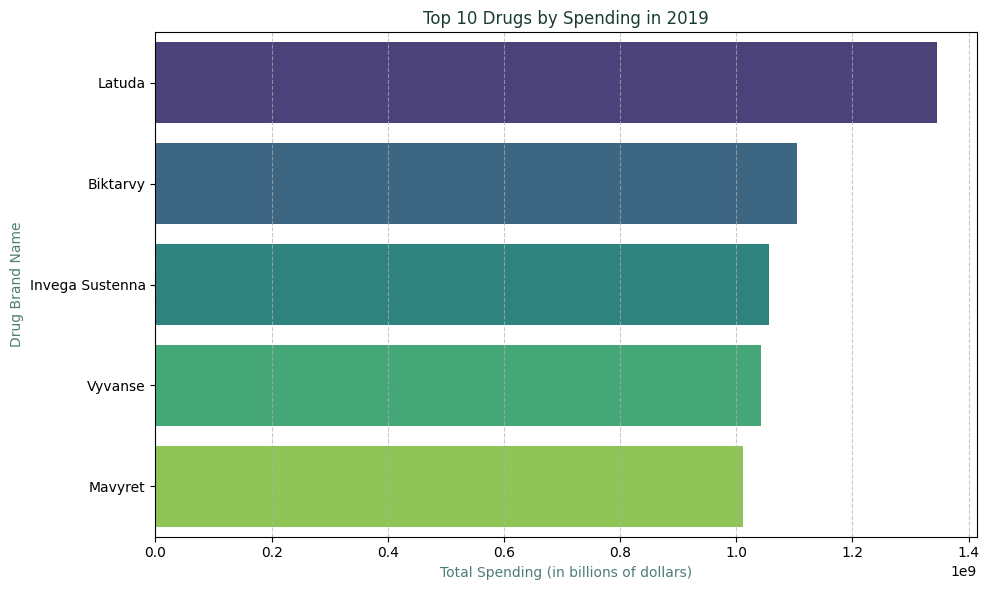

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/2256395267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


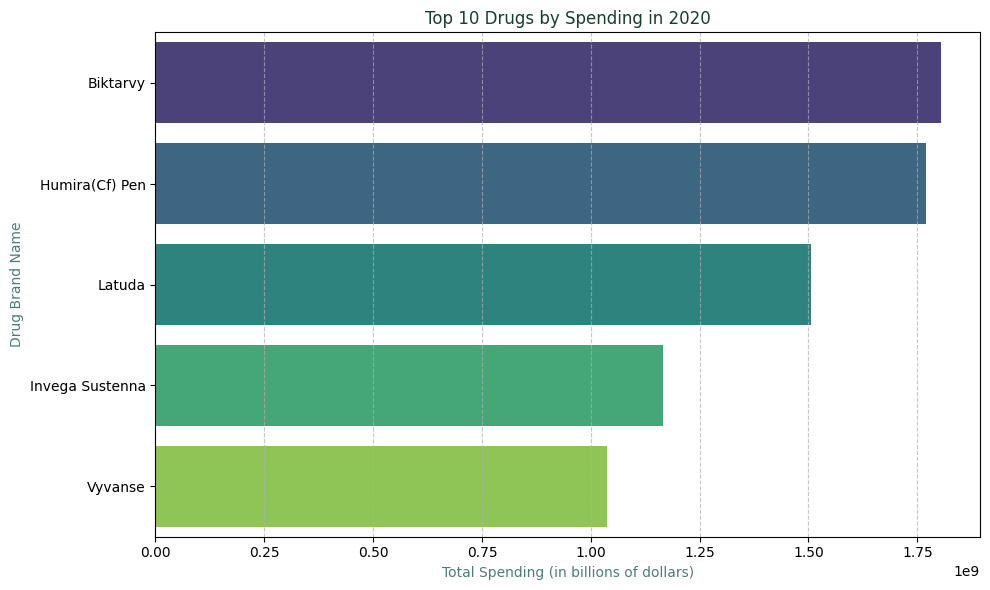

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/2256395267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


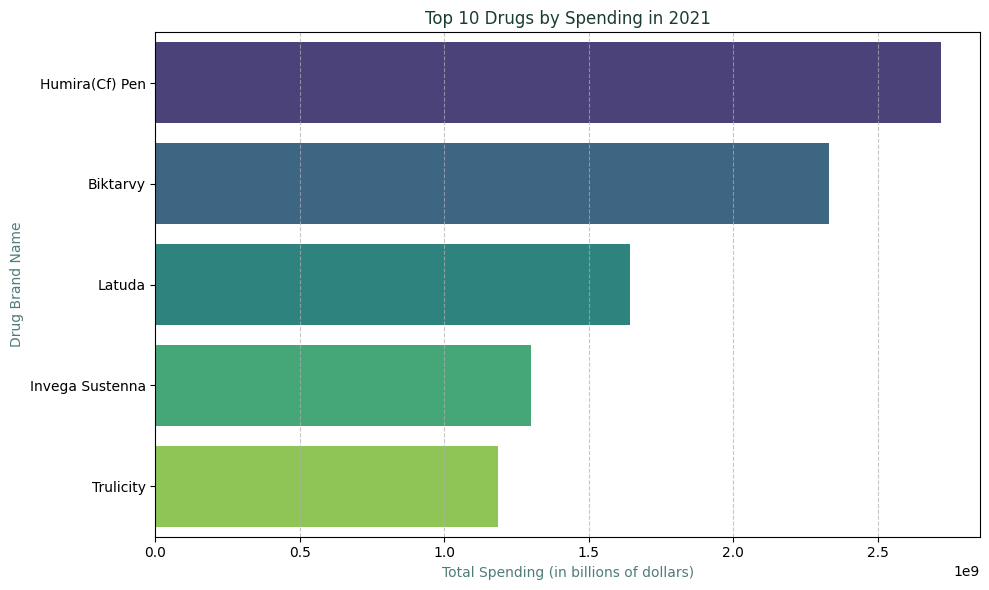

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/2256395267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


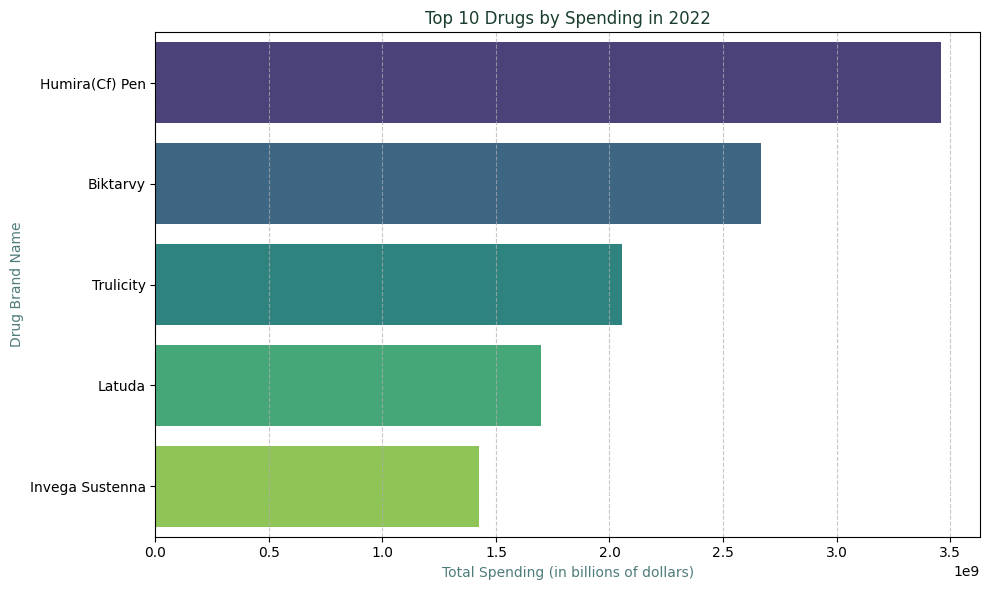

In [232]:
years = ['2018', '2019', '2020', '2021', '2022']
top_10_drugs_by_year = {}

for year in years:
    column_name = f'Tot_Spndng_{year}'
    top_10_drugs_by_year[year] = df.nlargest(10, column_name)[['Brnd_Name', column_name]]

# Plot the top 10 drugs for each year
for year in years:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=f'Tot_Spndng_{year}', 
        y='Brnd_Name', 
        data=top_10_drugs_by_year[year], 
        palette='viridis'
    )
    plt.title(f'Top 10 Drugs by Spending in {year}', color=colors["Dark jungle green"])
    plt.xlabel('Total Spending (in billions of dollars)', color=colors["Myrtle Green"])
    plt.ylabel('Drug Brand Name', color=colors["Myrtle Green"])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_69415/3556512846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Spending_All_Years', y='Brnd_Name', data=top_10_drugs, palette='viridis')


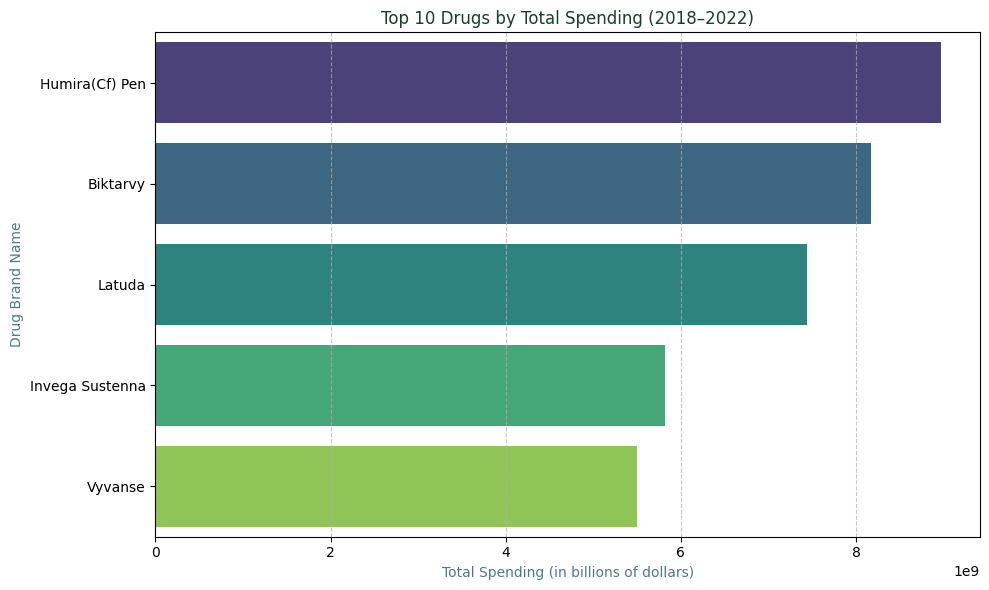

In [231]:
# Aggregate total spending across all years for each drug
df['Total_Spending_All_Years'] = df[['Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021', 'Tot_Spndng_2022']].sum(axis=1)

# Get the top 10 drugs based on total spending across all years
top_10_drugs = df.nlargest(10, 'Total_Spending_All_Years')[['Brnd_Name', 'Total_Spending_All_Years']]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Spending_All_Years', y='Brnd_Name', data=top_10_drugs, palette='viridis')
plt.title('Top 10 Drugs by Total Spending (2018–2022)', color=colors["Dark jungle green"])
plt.xlabel('Total Spending (in billions of dollars)', color=colors["Myrtle Green"])
plt.ylabel('Drug Brand Name', color=colors["Myrtle Green"])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Analysis: The yearly bar charts for the top 10 drugs reveal consistent dominance by high-cost drugs such as "Humira Pen," "Biktarvy," and "Latuda." These drugs have consistently ranked among the top in spending, reflecting their widespread use and high cost. The introduction of new drugs like "Trikafta" in 2020 also highlights the impact of innovative treatments on Medicaid spending. These drugs are commonly used for rheumatoid arthritis (HUMIRA), HIV-1 (Biktarvy), Schizophrenia (Latuda), and cystif fibrosis (Trikafta). This makes sense in the context of the Medicaid population's needs with disability-enrolled individuals and those with chronic conditions. While these drugs may not necessarily make up the largest amounts of claims, they account for a substantial share of gross spending as they are very costly drugs.

/var/folders/px/xswx41c943jbghpv8x0by0600000gn/T/ipykernel_24586/1807844843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_top10, x='Drug', y='Percentage Change', palette='coolwarm')


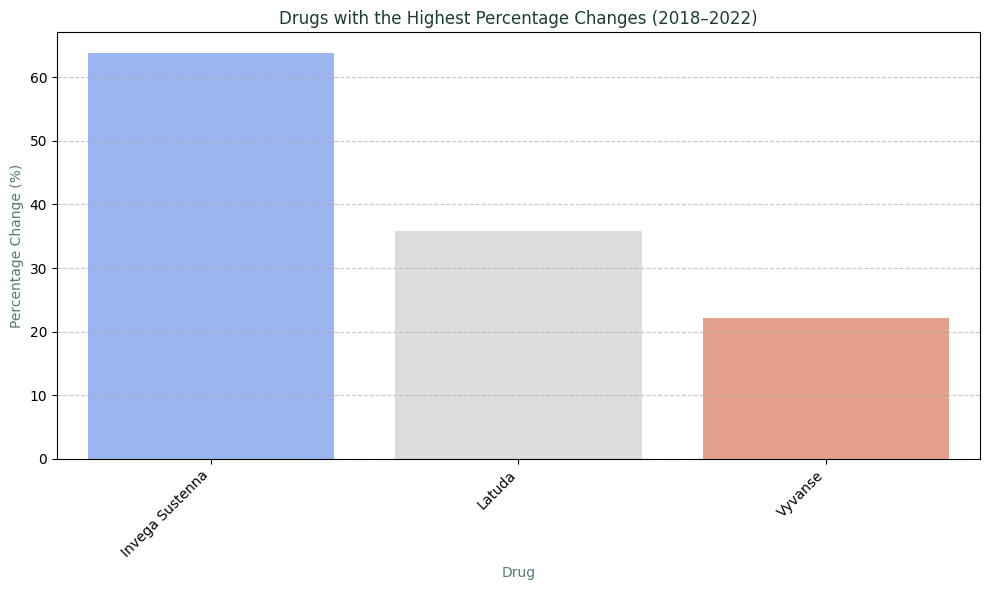

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_top10, x='Drug', y='Percentage Change', palette='coolwarm')

# Add labels and title
plt.title('Drugs with the Highest Percentage Changes (2018–2022)', color=colors["Dark jungle green"])
plt.xlabel('Drug', color=colors["Myrtle Green"])
plt.ylabel('Percentage Change (%)', color=colors["Myrtle Green"])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Analysis: The graph above highlights the percentage change in total Medicaid spending from 2018 to 2022 for the top 10 drugs in 2018. Among these drugs, "Invega Sustenna" experienced the highest percentage increase in spending, with a growth of approximately 63.88%. This significant rise could indicate increased utilization, higher pricing, or both. "Latuda" and "Vyvanse" also showed notable increases in spending, with growth rates of 35.75% and 22.17%, respectively. These trends suggest that these drugs have become more prominent in Medicaid spending over the years, potentially due to their effectiveness, expanded indications, or changes in prescribing patterns. In the context of the Medicaid population's needs, it is known that Medicaid spends highly on HIV/Hepatitis C, behavioral health, and chronic donditions. This is reflected in these drugs. For example, looking at the chart above of percent changes, Invega Sustenna is an anytipsychotic indicated for the treatment of schizophrenia. Latuda is also used for treating schizophrenia or bipolar disorder. Vyvanse is part of a group of medications called stimulants, and is used to treat a number of mental health conditions, includign attention deficit hyperactivity disorder (ADHD) among children and adults. Further investigation into the drivers of these increases, such as changes in claims, dosage units, or average spending per unit, would provide deeper insights into the factors contributing to this growth.

> ### <span style="color:#F24C00">Spending per Dosage Unit</span> 

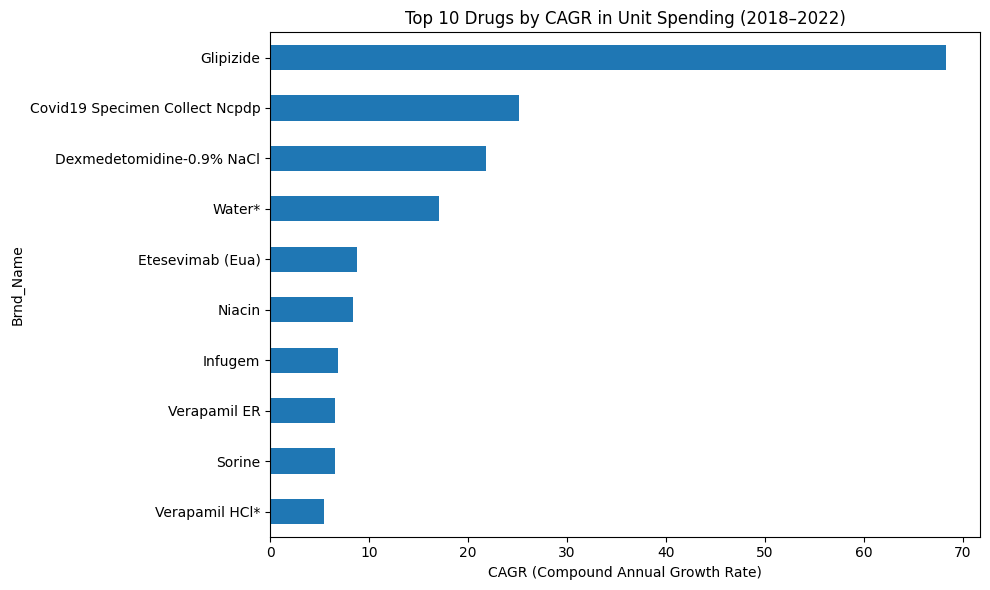

In [ ]:
# Top 10 Drugs by CAGR
top10_cagr = df[['Brnd_Name', 'CAGR_Avg_Spnd_Per_Dsg_Unt_18_22']].dropna()
top10_cagr = top10_cagr.groupby('Brnd_Name').mean().sort_values(
    by='CAGR_Avg_Spnd_Per_Dsg_Unt_18_22', ascending=False).head(10)

# Plot
top10_cagr.plot(kind='barh', figsize=(10,6), legend=False)
plt.title("Top 10 Drugs by CAGR in Unit Spending (2018–2022)")
plt.xlabel("CAGR (Compound Annual Growth Rate)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Analysis: The drug with the highest CAGR in average spending per dosage unit from 2018 to 2022 is "Glipizide" (68.31%), followed by "Covid19 Specimen Collect Ncpdp" (25.17%). Glipizide is a drug that lowers blood sugar  for patients with type 2 diabetes. The Covid19 Specimen Collect Ncpdp is used for speciment collection of COVID-19 tests. These being the highest average spending for dosage unit is reflective of broader chronic disease and healthcare trends in the US during 2018 to 2022. High blood pressure and diabetes are leading chronic diseases in the US, and the specimen collection is likely a result of the COVID-19 pandemic.

> ### <span style="color:#F24C00">Average Total Spending per Claim</span>

In [ ]:
# Calculate the correlation between total spending in 2018 and total claims in 2018
correlation_2018 = df['Tot_Spndng_2018'].corr(df['Tot_Clms_2018'])
print(f"Correlation between total spending and total claims in 2018: {correlation_2018:.2f}")
# Calculate the correlation between total spending in 2022 and total claims in 2022
correlation_2022 = df['Tot_Spndng_2022'].corr(df['Tot_Clms_2022'])
print(f"Correlation between total spending and total claims in 2022: {correlation_2022:.2f}")

Correlation between total spending and total claims in 2018: 0.24
Correlation between total spending and total claims in 2022: 0.18


##### Analysis: The correlation values between total spending and total claims in 2018 (0.24) and 2022 (0.18) indicate a **weak positive correlation** between the two variables in both years. Here's what this means:

##### **2018 correlation (0.24)**:A correlation of 0.24 suggests a weak positive relationship between total spending and total claims in 2018. This means that as the number of claims increases, total spending tends to increase slightly, but the relationship is not strong.

##### **2022 correlation (0.18)**: A correlation of 0.18 indicates an even weaker positive relationship between total spending and total claims in 2022 compared to 2018. This suggests that the connection between the two variables has diminished over time.

##### The weak correlations imply that other factors, such as the cost per claim, drug pricing, or the types of drugs being prescribed, may have a more significant impact on total spending than the number of claims alone. The decrease in correlation from 2018 to 2022 could reflect changes in Medicaid spending patterns, such as increased use of high-cost specialty drugs with fewer claims or shifts in prescribing behavior.

In [ ]:
# Define thresholds
cost_threshold = df['Avg_Spnd_Per_Clm_2022'].quantile(0.95)
low_claim_threshold = df['Tot_Clms_2022'].quantile(0.25)

# Filter data
high_cost_low_utilization = df[
    (df['Avg_Spnd_Per_Clm_2022'] >= cost_threshold) &
    (df['Tot_Clms_2022'] <= low_claim_threshold)
][['Brnd_Name', 'Avg_Spnd_Per_Clm_2022', 'Tot_Clms_2022']].sort_values(
    by='Avg_Spnd_Per_Clm_2022', ascending=False)

# View top results
print("High-Cost, Low-Utilization Drugs in 2022:")
print(high_cost_low_utilization.head(10))

High-Cost, Low-Utilization Drugs in 2022:
       Brnd_Name  Avg_Spnd_Per_Clm_2022  Tot_Clms_2022
16327  Zolgensma           1.363107e+06             64
16326  Zolgensma           1.363107e+06             64
8132     Kymriah           4.472669e+05             19
8133     Kymriah           4.472669e+05             19
16127   Yescarta           3.740267e+05             26
16126   Yescarta           3.740267e+05             26
2083     Cablivi           1.878730e+05            114
2084     Cablivi           1.878730e+05            114
13154    Revcovi           1.676771e+05            138
15329    Uplizna           1.328938e+05             29


##### Analysis: The above drugs indicate high costs for Medicaid drug spending, but low utilization based on the number of claims filed. These are the top 3 high-cost, low-utilization drugs, based on the data above: 
- Zolgensma: The most expensive drug with an average spending per claim of $1.36 million and only 64 claims.
- Kymriah: Another high-cost drug with an average spending per claim of $447,267 and 19 claims.
- Yescarta: With an average spending per claim of $374,027 and 26 claims.

> ### <span style="color:#F24C00">Total Claims Between 2018 and 2022</span>

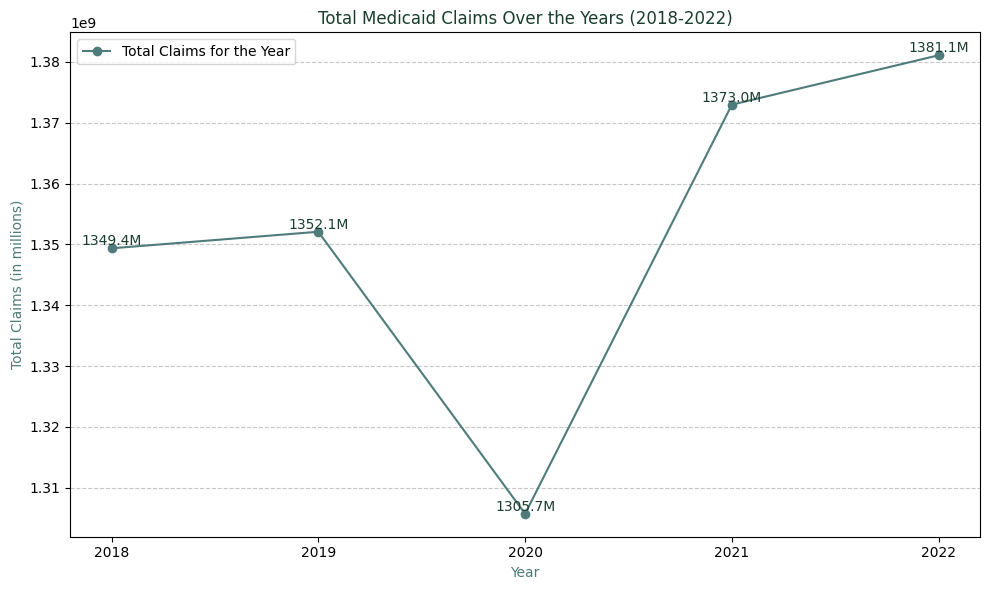

In [238]:

total_claims = [
    df['Tot_Clms_2018'].sum(),
    df['Tot_Clms_2019'].sum(),
    df['Tot_Clms_2020'].sum(),
    df['Tot_Clms_2021'].sum(),
    df['Tot_Clms_2022'].sum()
]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years, total_claims, marker='o', color=colors["Myrtle Green"], label='Total Claims for the Year')

# Add labels for each data point
for i, value in enumerate(total_claims):
    plt.text(years[i], value, f"{value/1e6:.1f}M", ha='center', va='bottom', fontsize=10, color=colors["Dark jungle green"])

# Add title and labels
plt.title('Total Medicaid Claims Over the Years (2018-2022)', color=colors["Dark jungle green"])
plt.xlabel('Year', color=colors["Myrtle Green"])
plt.ylabel('Total Claims (in millions)', color=colors["Myrtle Green"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### Analysis: There is a significant downward peak between 2019 and 2020 for total claims. This can be attributed to several factors, including the COVID-19 pandemic which significantly disrupted healthcare utilization and changes in Medicaid provisions. However, this could also be attributed to errors in data collection and outlier data mentioned in the description of the dataset. Further analysis is needed to confirm the causes behind this peak.

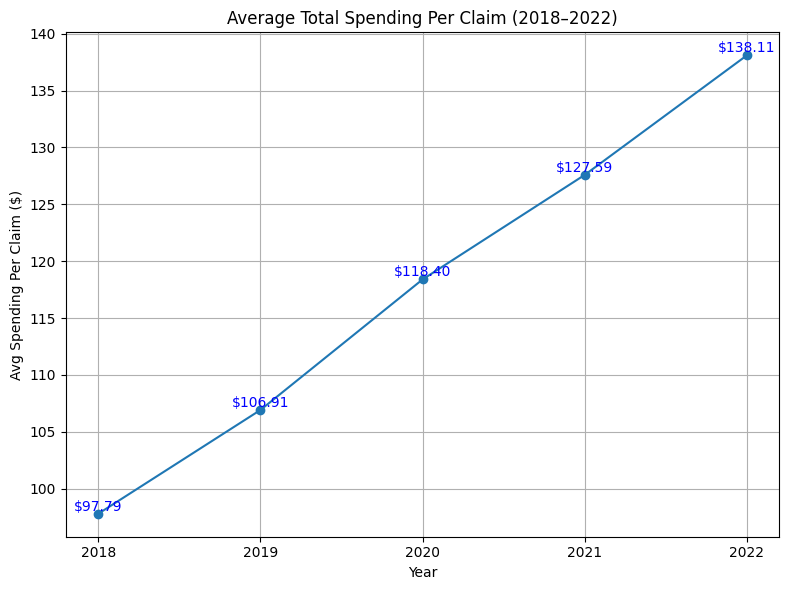

In [239]:
# Calculate total spending per claim for each year
avg_spend_per_claim_by_year = {
    '2018': df['Tot_Spndng_2018'].sum() / df['Tot_Clms_2018'].sum(),
    '2019': df['Tot_Spndng_2019'].sum() / df['Tot_Clms_2019'].sum(),
    '2020': df['Tot_Spndng_2020'].sum() / df['Tot_Clms_2020'].sum(),
    '2021': df['Tot_Spndng_2021'].sum() / df['Tot_Clms_2021'].sum(),
    '2022': df['Tot_Spndng_2022'].sum() / df['Tot_Clms_2022'].sum(),
}

# Convert to DataFrame for plotting
avg_spend_df = pd.DataFrame(list(avg_spend_per_claim_by_year.items()), columns=['Year', 'Avg_Total_Spending_Per_Claim'])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(avg_spend_df['Year'], avg_spend_df['Avg_Total_Spending_Per_Claim'], marker='o')

# Add dollar values to each point
for i, row in avg_spend_df.iterrows():
    plt.text(row['Year'], row['Avg_Total_Spending_Per_Claim'], f"${row['Avg_Total_Spending_Per_Claim']:.2f}", 
             ha='center', va='bottom', fontsize=10, color='blue')

plt.title("Average Total Spending Per Claim (2018–2022)")
plt.xlabel("Year")
plt.ylabel("Avg Spending Per Claim ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Analysis: The line plot illustrates the trend in average total spending per Medicaid claim from 2018 to 2022. Over this five-year period, there is a consistent upward trajectory in spending per claim, indicating that the cost associated with each prescription fill has been steadily increasing. 

- In 2018, the average spending per claim was approximately $97.79.
- By 2022, this figure had risen to around $138.11, representing a significant increase of over 41% across the five years.

This growth could be attributed to several factors, including rising drug prices, increased utilization of high-cost medications, or changes in the composition of drugs being prescribed. The trend highlights the growing financial burden of Medicaid drug spending on a per-claim basis, emphasizing the need for further investigation into the drivers of these increases, such as shifts in prescribing patterns, introduction of new high-cost drugs, or inflationary pressures in the pharmaceutical market.

### <span style="color:#A2D5D0">Conclusions</span>

##### This project analyzed Medicaid drug spending on outpatient prescription drugs from 2018 to 2022 using real-world claims and cost data. The analysis found a consistent increase in both total Medicaid spending and average spending per prescription claim over time. Notably, while total claims peaked in 2021, costs per claim continued to rise steadily across all five years. This reflects Medicaid's growing spending on high-cost specialty drugs to treat beneficiaries with costly conditions like chronic diseases (type 2 diabetes, hypertension, obesity), behavioral conditions (like schizophrenia, bipolar disorder, depression, and ADHD), and costly conditions like rheumatoid arthritis and HIV-1. 

##### Using growth rate analysis, the top 10 drugs with the fastest-growing unit costs were identified. These drugs reflect concerns about sustained affordability, especially as total spending does not necessarily match the rate in total number of claims. I also identified high-cost, low utilization drugs to reflect this concern as policymakers discuss Medicaid' disproportionate spending on new high-cost specialty drugs, which highlights potential areas for review in Medicaid formularies or negotiated prices.

##### Correlation analysis revealed strong positive associations between claim volume and spending in both 2018 and 2022, but variation in average cost per claim suggests changes in drug mix or pricing practices. These findings underscore the value of continuous monitoring in pharmaceutical policy and cost control within Medicaid.

##### Lastly, an interesting analysis was seeing the potential impacts of the COVID-19 pandemic on claims and spending. In 2020, there was a slight decline in total claims compared to prior years, which likely reflects reduced access to non-urgent healthcare services and prescription refills during the early lockdown period. However, by 2021, total claims spiked significantly, which could be due to deferred care being resumed or increased demand for therapeutics related to pandemic recovery, for example COVID-19 tests. Interestingly, while claims volume fluctuated, the average spending per claim continued to rise consistently throughout the pandemic years (2020–2022). This suggests that even as the number of prescriptions varied, the cost per treatment remained high or increased, possibly due to shifts in the types of medications being prescribed, such as more expensive specialty drugs.